# Álgebra Linear Numérica - Tarefa 3
### Aluna: Virgínia Balbo

##### imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import matplotlib.patches as mpatches
import random

## Calculando a pseudo-inversa usando SVD

<p> A função numpy.linalg.pinv(M) do python utiliza SVD para calcular a pseudo inversa da matriz M. Ela será utilizada durante todo o trabalho. </p>

## Ajuste da Reta

<p> A equação da reta é conhecida $y = ax + b$.</p>

<p> Se não soubermos os valores para $a$ e para $b$ mas tivermos uma amostra de valores para $x$ e $y$ podemos enxergar as variaveis $x$ e $y$ da equação como sendo vetores, chamaremos, portando de $X$ e $Y$ onde </p>

<p> $Y = \left[\matrix{y_0 & y_1 & y_2 & ...}\right]$ </p>
<p> $X = \left[\matrix{x_0 & x_1 & x_2 & ...}\right]$ </p>

<p> Temos, portanto, a equação da reta representada como $Y = aX + b$. Dessa forma temos</p>

<p> $y_0 = ax_0 + b$ </p>
<p> $y_1 = ax_1 + b$ </p>
<p> $y_2 = ax_2 + b$ </p>
<p> $...$ </p>

<p> Em outra notação $y_n = ax_n + b$, para $n = 0, 1, 2, ...$</p>

<p> Podemos, no entando, representar a equação da reta como $Y = CX$, fazendo </p>

<p> $Y = \left[\matrix{y_0 & y_1 & y_2 & ...}\right]$ </p>
<p> $X = \left[\matrix{x_0 & x_1 & x_2 & ... \\ 1 & 1 & 1 & ...}\right]$ </p>
<p> $C = \left[\matrix{a & b}\right]$ </p>

<p> Dessa forma obtemos, equivalentemente, as equações $y_n = ax_n + b$, para $n = 0, 1, 2, ...$</p>

<p> Queremos descobrir os valores de $a$ e $b$, ou seja, queremos descobrir $C$. Para isso temos que isolar $C$ em $Y = CX$.</p>

$$Y = CX \Leftrightarrow YX^{-1} = CXX^{-1} \Leftrightarrow YX^{-1} = CI \Leftrightarrow YX^{-1} = C $$

<p> Temos portanto que $C = YX^{-1}$.

<p> Obs.: Como $X$ não é uma matriz quadrada, não é possível calcular a inversa dela. Para isso utilizaremos então a pseudo-inversa. </p>

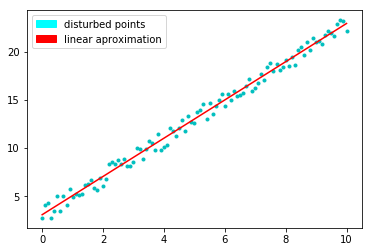

Reta original: y = 2x + 3
Reta aproximada: y = 1.98699009901x + 3.07495049505


In [2]:
# gerar pontos pertecentes a reta y = 2x + 3
x = np.arange(0, 10 + 0.1, 0.1)
X = np.array([x , np.ones(len(x))])
Y = np.array(2*x + 3*np.ones(len(x)))

# Adicionar perturbação
for i in range(len(Y)):
    Y[i] = Y[i] + random.randrange(-100,100,1)/100.

# Calcular C = YX^(-1)
C = np.dot(Y,np.linalg.pinv(X))

Y_approx = np.array(C[0]*x + C[1]*np.ones(len(x)))
    
# Plot
plt.plot(x,Y,'.c')
plt.plot(x,Y_approx,'r')

## Legenda
cyan_patch = mpatches.Patch(color='cyan', label='disturbed points')
red_patch = mpatches.Patch(color='red', label='linear aproximation')
plt.legend(handles=[cyan_patch, red_patch])

plt.show()

## Info
print("Reta original: y = 2x + 3")
print("Reta aproximada: y = " + str(C[0]) + "x + " + str(C[1]))

## Ajuste da Parábola

<p> A equação da parábola é conhecida $y = ax^2 + bx + c$.</p>

<p> Queremos descobrir $a$, $b$ e $c$ tendo uma amostra para $X$ e $Y$. Analogamente à representação da reta podemos representar $Y = CX \Leftrightarrow C = YX^{-1}$, para isso temos que</p>

<p> $Y = \left[\matrix{y_0 & y_1 & y_2 & ...}\right]$ </p>
<p> $X = \left[\matrix{x_0^2 & x_1^2 & x_2^2 & ... \\ x_0 & x_1 & x_2 & ... \\ 1 & 1 & 1 & ...}\right]$ </p>
<p> $C = \left[\matrix{a & b & c}\right]$ </p>

<p> Temos, portanto, </p>

<p>$y_0 = ax_0^2 + bx_0 + c$</p>
<p>$y_1 = ax_1^2 + bx_1 + c$</p>
<p>$y_2 = ax_2^2 + bx_2 + c$</p>
<p>$...$</p>

<p> Em outra notação $y_n = ax_n^2 + bx_n + c$, para $n = 0, 1, 2, ...$</p>

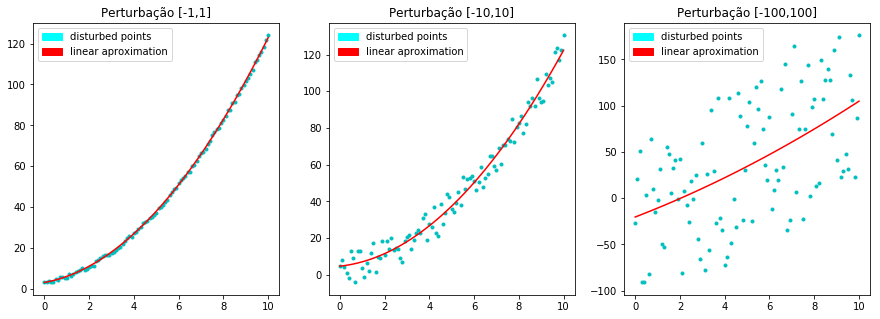

In [3]:
# gerar pontos pertecentes a parábola y = x² + 2x + 3
x = np.arange(0, 10 + 0.1, 0.1)
X = np.array([x**2, x , np.ones(len(x))])
Y1 = np.array(x**2 + 2*x + 3*np.ones(len(x)))
Y2 = np.array(x**2 + 2*x + 3*np.ones(len(x)))
Y3 = np.array(x**2 + 2*x + 3*np.ones(len(x)))

# Adicionar perturbação
for i in range(len(Y1)):
    Y1[i] = Y1[i] + random.randrange(-100,100,1)/100.
    Y2[i] = Y2[i] + random.randrange(-1000,1000,1)/100.
    Y3[i] = Y3[i] + random.randrange(-10000,10000,1)/100.

# Calcular C = YX^(-1)
C1 = np.dot(Y1,np.linalg.pinv(X))
C2 = np.dot(Y2,np.linalg.pinv(X))
C3 = np.dot(Y3,np.linalg.pinv(X))

Y1_approx = np.array(C1[0]*x**2 + C1[1]*x + C1[2]*np.ones(len(x)))
Y2_approx = np.array(C2[0]*x**2 + C2[1]*x + C2[2]*np.ones(len(x)))
Y3_approx = np.array(C3[0]*x**2 + C3[1]*x + C3[2]*np.ones(len(x)))
    
# Plot
f, (plt0, plt1, plt2) = plt.subplots(1, 3, figsize=(15,5))
plt0.set_title("Perturbação [-1,1]")
plt0.plot(x,Y1,'.c')
plt0.plot(x,Y1_approx,'r')
plt1.set_title("Perturbação [-10,10]")
plt1.plot(x,Y2,'.c')
plt1.plot(x,Y2_approx,'r')
plt2.set_title("Perturbação [-100,100]")
plt2.plot(x,Y3,'.c')
plt2.plot(x,Y3_approx,'r')

## Legenda
cyan_patch = mpatches.Patch(color='cyan', label='disturbed points')
red_patch = mpatches.Patch(color='red', label='linear aproximation')
plt0.legend(handles=[cyan_patch, red_patch])
plt1.legend(handles=[cyan_patch, red_patch])
plt2.legend(handles=[cyan_patch, red_patch])

plt.show()

## Ajuste das funções Seno e Cosseno

<p> Uma função seno pode ser representada como $x\left(\theta\right) = a \cdot sin\left(\theta\right) + b$.</p>

<p> Se não soubermos os valores para $a$ e para $b$ mas tivermos uma amostra de valores para $x$ e $\theta$ podemos descobrir $a$ e $b$ fazendo</p>

<p> $X = \left[\matrix{x_0 & x_1 & x_2 & ...}\right]$ </p>
<p> $F_{sin} = \left[\matrix{sin\left(\theta_0\right) & sin\left(\theta_1\right) & sin\left(\theta_2\right) & ... \\ 1 & 1 & 1 & ...}\right]$ </p>
<p> $C = \left[\matrix{a & b}\right]$ </p>

<p> Temos, portanto, a função seno representada como $X = C \cdot F_{sin}$. Dessa forma temos</p>

<p>$x_0 = a \cdot sin\left(\theta_0\right) + b$</p>
<p>$x_1 = a \cdot sin\left(\theta_1\right) + b$</p>
<p>$x_2 = a \cdot sin\left(\theta_2\right) + b$</p>
<p>$...$</p>

<p> Em outra notação $x_n = a \cdot sin\left(\theta_n\right) + b$, para $n = \left[0,2\pi\right)$</p>

<p> Podemos isolar $C$ fazendo </p>

<p> $X = C \cdot F_{sin} \Leftrightarrow X \cdot F_{sin}^{-1} = C \cdot F_{sin} \cdot F_{sin}^{-1} \Leftrightarrow X \cdot F_{sin}^{-1} = C \cdot I \Leftrightarrow X \cdot F_{sin}^{-1} = C$ </p>

<p> Temos portanto que $C = F_{sin}^{-1}$. </p>

<p> Analogamente temos a função cosseno $x\left(\theta\right) = a \cdot cos\left(\theta\right) + b$ sendo representada como $X = C \cdot F_{cos} \Leftrightarrow C = X \cdot F_{cos}^{-1}$ onde </p>

<p> $X = \left[\matrix{x_0 & x_1 & x_2 & ...}\right]$ </p>
<p> $F_{cos} = \left[\matrix{cos\left(\theta_0\right) & cos\left(\theta_1\right) & cos\left(\theta_2\right) & ... \\ 1 & 1 & 1 & ...}\right]$ </p>
<p> $C = \left[\matrix{a & b}\right]$ </p>

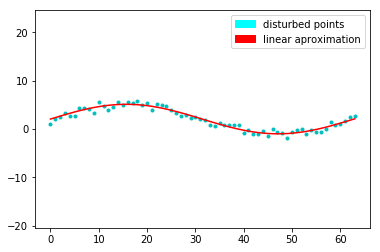

In [4]:
# gerar pontos pertecentes a parábola y = 3cos(theta) + 2
theta = np.arange(0, 2*m.pi + 0.1, 0.1)
sin_theta = np.sin(theta)

FSIN = np.array([sin_theta, np.ones(len(sin_theta))])
Y = 3*sin_theta + 2*np.ones(len(sin_theta))

for i in range(len(Y)):
    Y[i] = Y[i] + random.randrange(-100,100,1)/100.
    
# Calcular C = YFSIN^(-1)
C = np.dot(Y,np.linalg.pinv(FSIN))

Y_approx = C[0]*np.sin(theta) + C[1]

# Plot
plt.axis('equal')
plt.plot(Y, ".c")
plt.plot(Y_approx, "r")

## Legenda
cyan_patch = mpatches.Patch(color='cyan', label='disturbed points')
red_patch = mpatches.Patch(color='red', label='linear aproximation')
plt.legend(handles=[cyan_patch, red_patch])

plt.show()

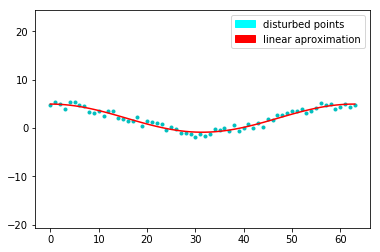

In [5]:
# gerar pontos pertecentes a parábola y = 3cos(theta) + 2
theta = np.arange(0, 2*m.pi + 0.1, 0.1)
cos_theta = np.cos(theta)

FCOS = np.array([cos_theta, np.ones(len(cos_theta))])
Y = 3*cos_theta + 2*np.ones(len(cos_theta))

for i in range(len(Y)):
    Y[i] = Y[i] + random.randrange(-100,100,1)/100.
    
# Calcular C = YFCOS^(-1)
C = np.dot(Y,np.linalg.pinv(FCOS))

Y_approx = C[0]*np.cos(theta) + C[1]

# Plot
plt.axis('equal')
plt.plot(Y, ".c")
plt.plot(Y_approx, "r")

## Legenda
cyan_patch = mpatches.Patch(color='cyan', label='disturbed points')
red_patch = mpatches.Patch(color='red', label='linear aproximation')
plt.legend(handles=[cyan_patch, red_patch])

plt.show()

## Ajuste do Círculo e da Elipse

<p> A equação do círculo parametrizada é dada por </p>

$\left\{\begin{matrix}
x\left(\theta\right) = r \cdot cos\left(\theta\right) + x_{translation}
\\ 
y\left(\theta\right) = r \cdot sin\left(\theta\right) + y_{translation}
\end{matrix}\right.$

<p>com $\theta = \left[0,2\pi\right)$.</p>

<p> Dessa forma, podemos aproximar o círculo da mesma forma que aproximamos as funções de seno e cosseno acima.</p>

<p> Analogamente podemos também aproximar a elipse, dada a sua equação parametrizada </p>

$\left\{\begin{matrix}
x\left(\theta\right) = r_x \cdot cos\left(\theta\right) + x_{translation}
\\ 
y\left(\theta\right) = r_y \cdot sin\left(\theta\right) + y_{translation}
\end{matrix}\right.$

<p>com $\theta = \left[0,2\pi\right)$.</p>

<p> Obs.: A equação da elipse torna-se a equação do círculo quando $r_x = r_y$. Dessa forma, podemos dizer que a elipse é a equação geral e o círculo é um caso particular de elipse. </p>

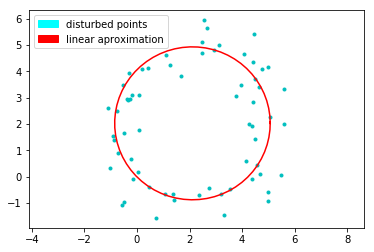

In [6]:
theta = np.arange(0, 2*m.pi + 0.1, 0.1)
sin_theta = np.sin(theta)
cos_theta = np.cos(theta)

FSIN = np.array([sin_theta, np.ones(len(sin_theta))])
FCOS = np.array([cos_theta, np.ones(len(cos_theta))])
X = 3*cos_theta + 2*np.ones(len(cos_theta))
Y = 3*sin_theta + 2*np.ones(len(sin_theta))

for i in range(len(Y)):
    X[i] = X[i] + random.randrange(-100,100,1)/100.
    Y[i] = Y[i] + random.randrange(-100,100,1)/100.
    
# Calcular C = XFCOS^(-1)
CX = np.dot(X,np.linalg.pinv(FCOS))
    
# Calcular C = YFSIN^(-1)
CY = np.dot(Y,np.linalg.pinv(FSIN))

X_approx = CX[0]*np.cos(theta) + CX[1]
Y_approx = CY[0]*np.sin(theta) + CY[1]

# Plot
plt.axis("equal")
plt.plot(X,Y,'.c')
plt.plot(X_approx,Y_approx,'r')

## Legenda
cyan_patch = mpatches.Patch(color='cyan', label='disturbed points')
red_patch = mpatches.Patch(color='red', label='linear aproximation')
plt.legend(handles=[cyan_patch, red_patch])

plt.show()

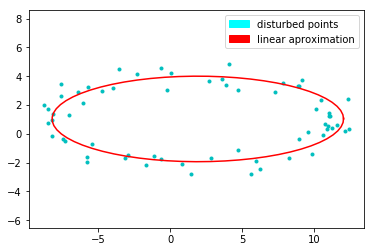

In [7]:
theta = np.arange(0, 2*m.pi + 0.1, 0.1)
sin_theta = np.sin(theta)
cos_theta = np.cos(theta)

FSIN = np.array([sin_theta, np.ones(len(sin_theta))])
FCOS = np.array([cos_theta, np.ones(len(cos_theta))])
X = 10*cos_theta + 2*np.ones(len(cos_theta))
Y = 3*sin_theta + 1*np.ones(len(sin_theta))

for i in range(len(Y)):
    X[i] = X[i] + random.randrange(-100,100,1)/100.
    Y[i] = Y[i] + random.randrange(-100,100,1)/100.
    
# Calcular C = XFCOS^(-1)
CX = np.dot(X,np.linalg.pinv(FCOS))
    
# Calcular C = YFSIN^(-1)
CY = np.dot(Y,np.linalg.pinv(FSIN))

X_approx = CX[0]*np.cos(theta) + CX[1]
Y_approx = CY[0]*np.sin(theta) + CY[1]

# Plot
plt.axis("equal")
plt.plot(X,Y,'.c')
plt.plot(X_approx,Y_approx,'r')

## Legenda
cyan_patch = mpatches.Patch(color='cyan', label='disturbed points')
red_patch = mpatches.Patch(color='red', label='linear aproximation')
plt.legend(handles=[cyan_patch, red_patch])

plt.show()